# General analysis

In [2]:
import pandas as pd
import json

file_path = r'C:\Users\Kinga\Desktop\iiad_magisterskie\2_sem\NLP\all_gs.json'
data_list = []
with open(file_path, 'r', encoding="utf8") as file:
    for line in file:
        json_data = json.loads(line)
        data_list.append(json_data)

df = pd.json_normalize(data_list)


In [3]:
df.head()

,id_left,category_left,cluster_id_left,identifiers_left,id_right,category_right,cluster_id_right,identifiers_right,label,pair_id,...,keyValuePairs_right.Optical Image Stabilizer,keyValuePairs_right.Aperture Type,keyValuePairs_right.Minimum Aperture,keyValuePairs_right.Max. Diameter,keyValuePairs_right.Standard Accessories,keyValuePairs_right.Grossissement:,keyValuePairs_right.Diamètre:,keyValuePairs_right.Etanchéité:,keyValuePairs_right.Poids en gramme:,keyValuePairs_right.Caractéristique:
0,1861077,Camera_and_Photo,539882,[{'/mpn': '[ahdmc301]'}],7623104,Camera_and_Photo,1343577,"[{'/mpn': '[achom001]'}, {'/gtin13': '[8182790...",0,1861077#7623104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3083228,Computers_and_Accessories,640007,"[{'/mpn': '[9hlf4lbdbe]'}, {'/gtin13': '[47187...",3424944,Computers_and_Accessories,640007,"[{'/mpn': '[9hlf4lbdbe]'}, {'/gtin13': '[47187...",1,3083228#3424944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,403467,Jewelry,625465,"[{'/productID': '[100016654]'}, {'/mpn': '[a11...",14740210,Jewelry,66696,"[{'/productID': '[100016653]'}, {'/mpn': '[a11...",0,403467#14740210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1383359,Shoes,10097862,[{'/mpn': '[819899001]'}],8139158,Shoes,14295887,[{'/mpn': '[852930003]'}],0,1383359#8139158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2677362,Camera_and_Photo,7228103,[{'/sku': '[dcs6045lkt]'}],15923,Camera_and_Photo,262578,[{'/productID': '[818194011852]'}],0,2677362#15923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Number of o observations in each category and label

In [4]:
plot_df = df[['category_left', 'label']]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Automotive'),
  Text(1, 0, 'Camera_and_Photo'),
  Text(2, 0, 'Cellphones_and_Accessories'),
  Text(3, 0, 'Computers_and_Accessories'),
  Text(4, 0, 'Jewelry'),
  Text(5, 0, 'Luggage_and_Travel_Gear'),
  Text(6, 0, 'Office_Products'),
  Text(7, 0, 'Other_Electronics'),
  Text(8, 0, 'Shoes'),
  Text(9, 0, 'Sports_and_Outdoors'),
  Text(10, 0, 'Video_Games'),
  Text(11, 0, 'not found')])

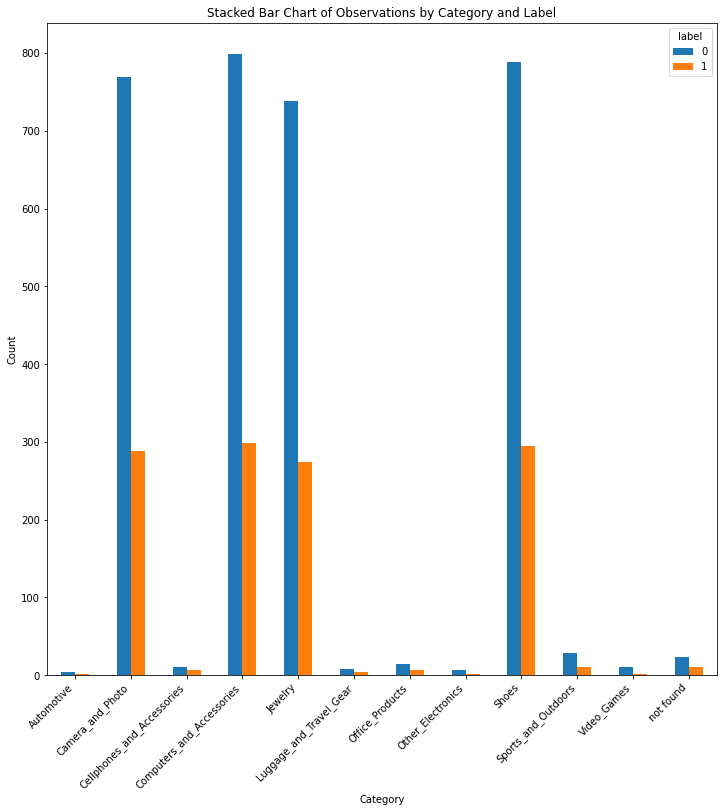

In [5]:
import matplotlib.pyplot as plt

grouped_data = plot_df.groupby(['category_left', 'label']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(12, 12))

grouped_data.plot(kind='bar', stacked=False, ax=ax)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Observations by Category and Label')
plt.xticks(rotation=45, ha='right')  


In [9]:
df_cam = df[df['category_left'] == 'Camera_and_Photo']
df_com = df[df['category_left'] == 'Computers_and_Accessories']
df_jew = df[df['category_left'] == 'Jewelry']
df_sh = df[df['category_left'] == 'Shoes']

In [10]:
columns_to_drop = [col for col in df.columns if col.startswith('keyValuePairs')]
df = df.drop(columns=columns_to_drop)

### Missing values analysis

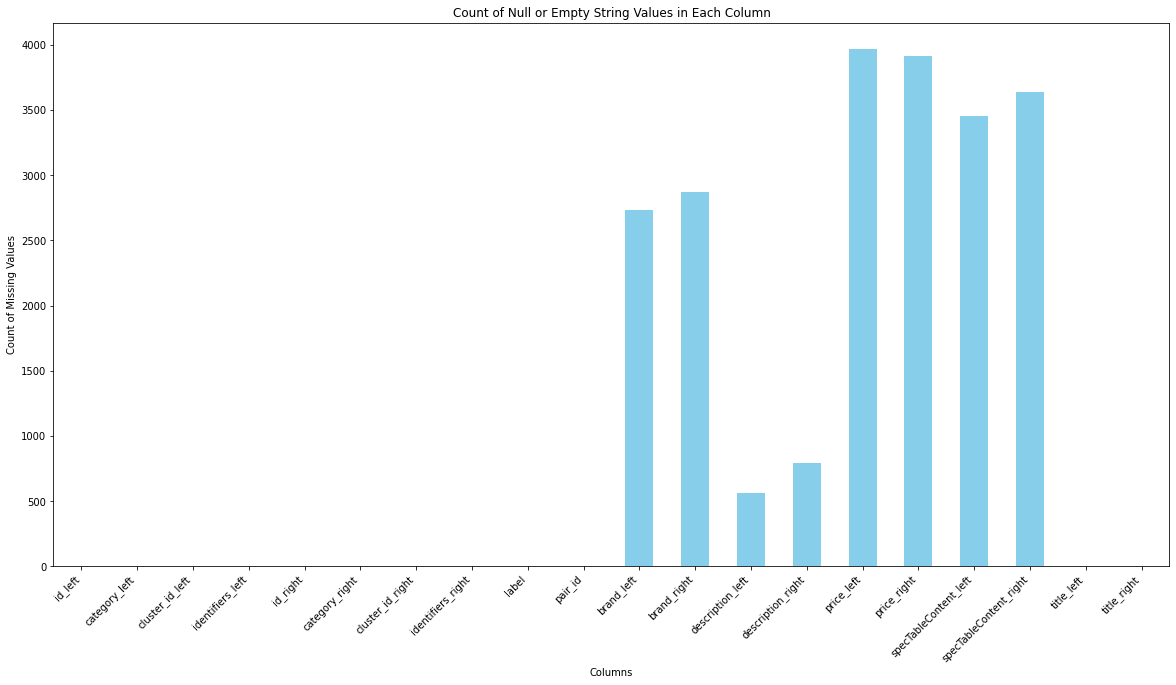

In [26]:
missing_values_count = df.isnull().sum() + (df == '').sum()

fig, ax = plt.subplots(figsize=(20, 10))
missing_values_count.plot(kind='bar', color='skyblue', ax=ax)

plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45, ha='right')  
plt.title('Count of Null or Empty String Values in Each Column')
plt.show()

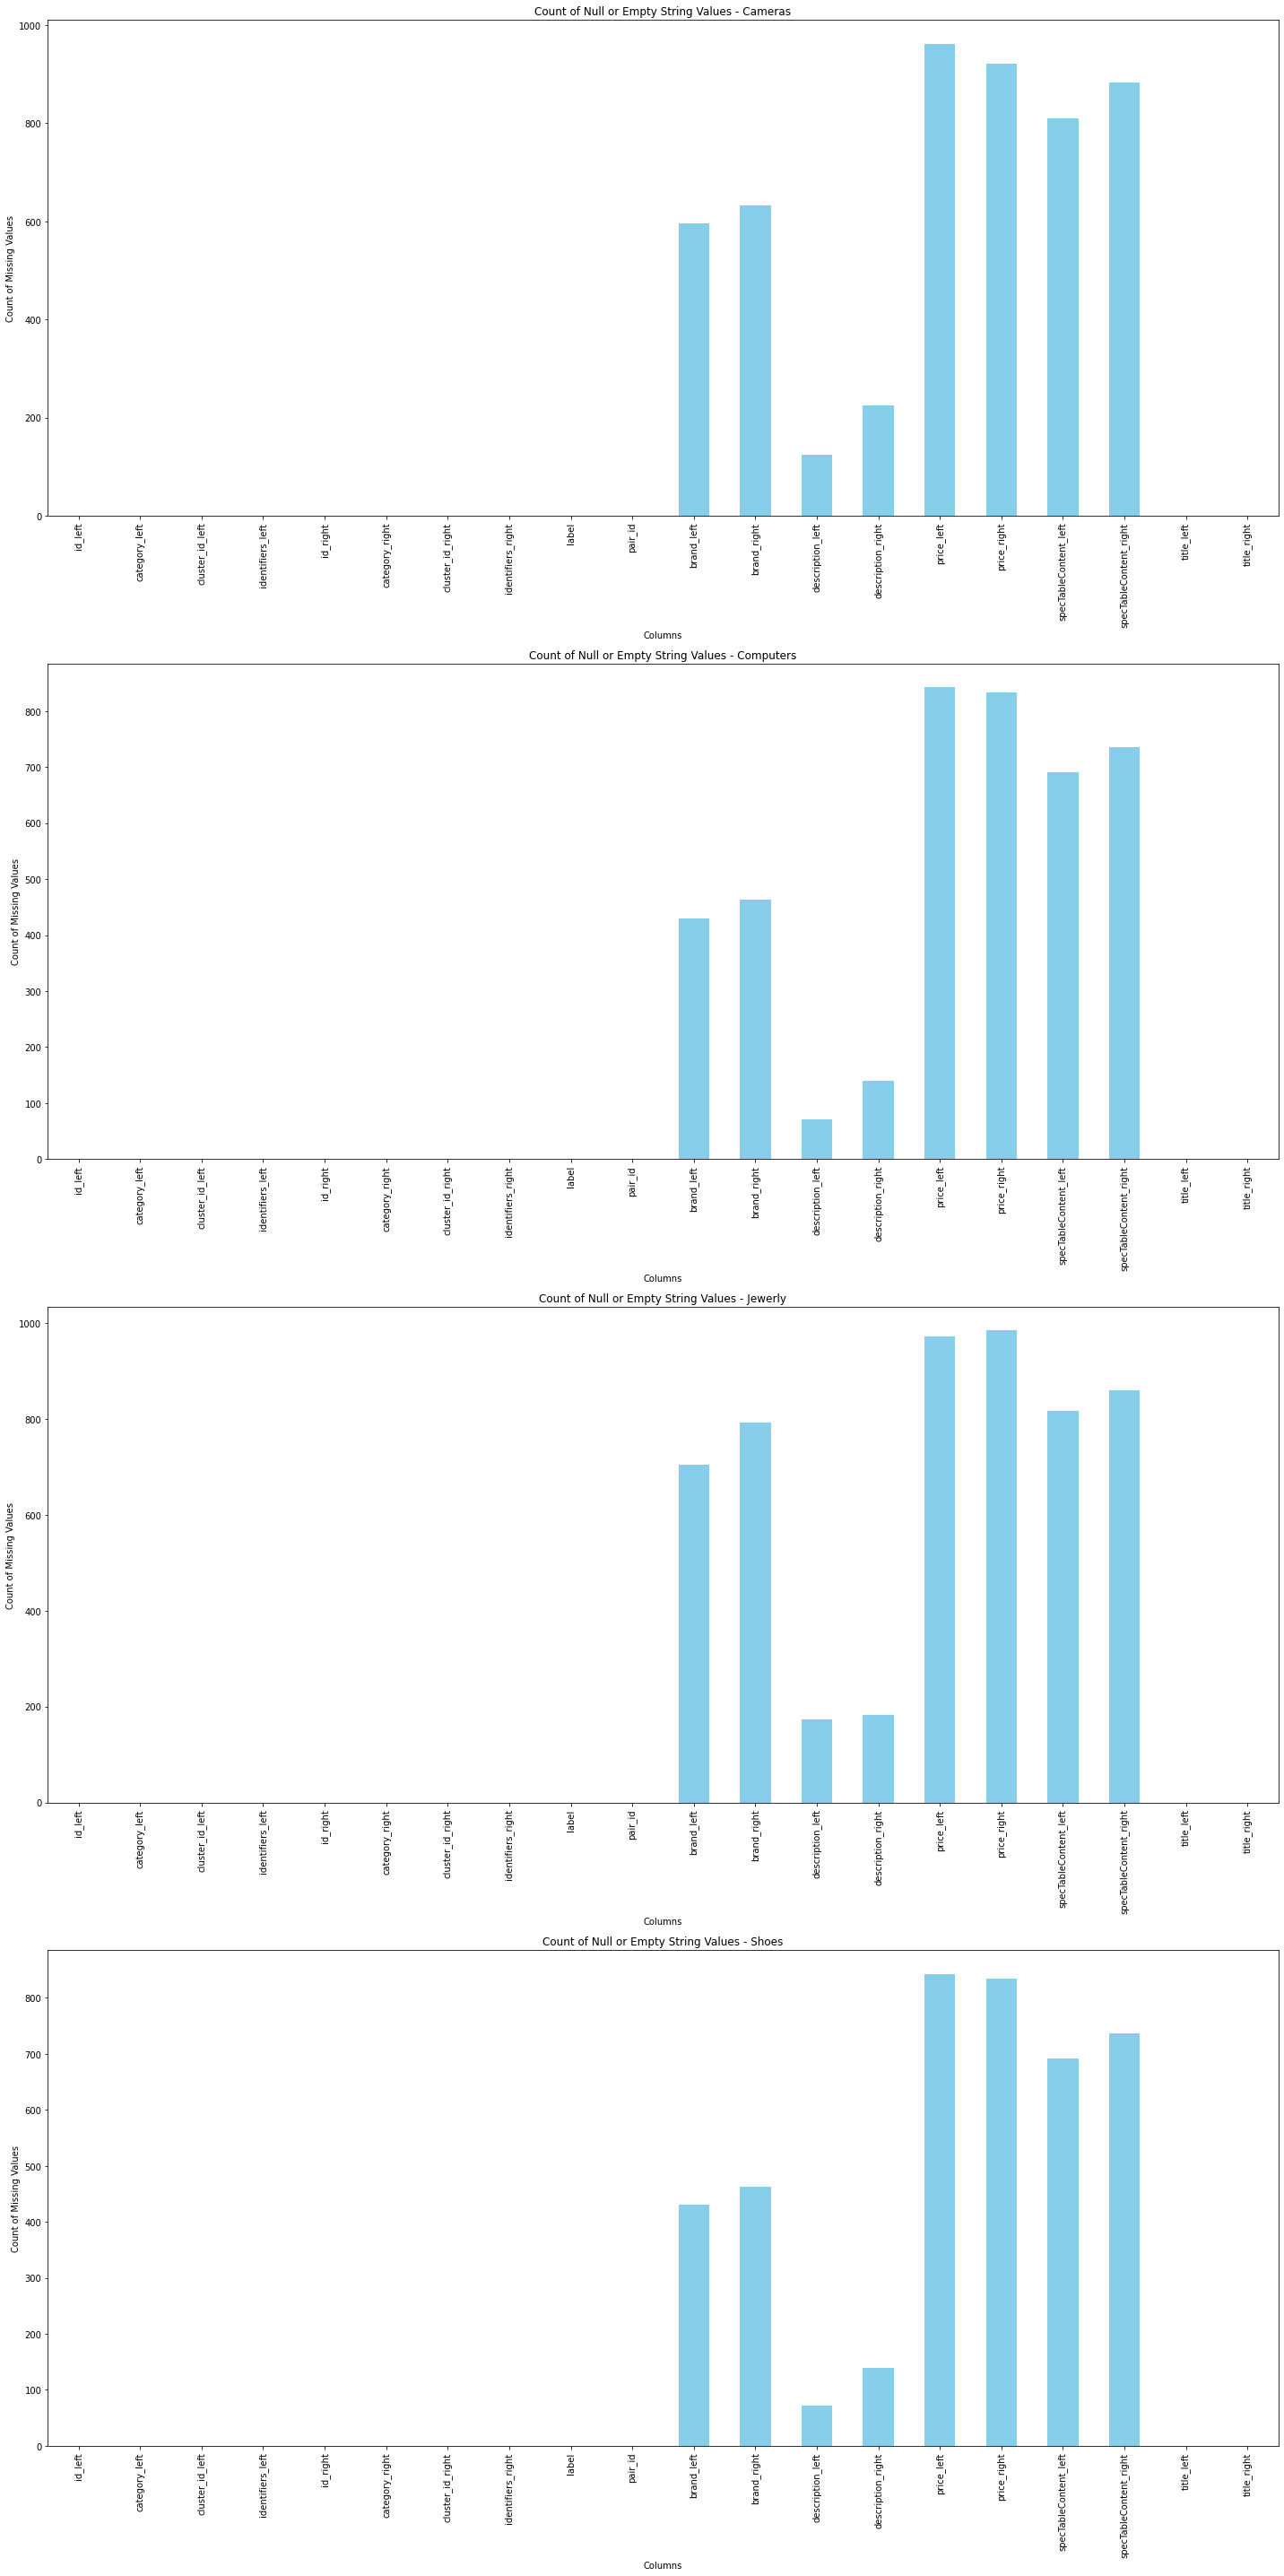

In [13]:
missing_values_count_df1 = df_cam.isnull().sum() + (df_cam == '').sum()
missing_values_count_df2 = df_com.isnull().sum() + (df_com == '').sum()
missing_values_count_df3 = df_jew.isnull().sum() + (df_jew == '').sum()
missing_values_count_df4 = df_sh.isnull().sum() + (df_sh == '').sum()

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 40))

missing_values_count_df1.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Count of Null or Empty String Values - Cameras')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Count of Missing Values')
missing_values_count_df2.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('Count of Null or Empty String Values - Computers')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Count of Missing Values')

missing_values_count_df3.plot(kind='bar', color='skyblue', ax=axes[2])
axes[2].set_title('Count of Null or Empty String Values - Jewerly')
axes[2].set_xlabel('Columns')
axes[2].set_ylabel('Count of Missing Values')

missing_values_count_df2.plot(kind='bar', color='skyblue', ax=axes[3])
axes[3].set_title('Count of Null or Empty String Values - Shoes')
axes[3].set_xlabel('Columns')
axes[3].set_ylabel('Count of Missing Values')
plt.tight_layout()
plt.show()

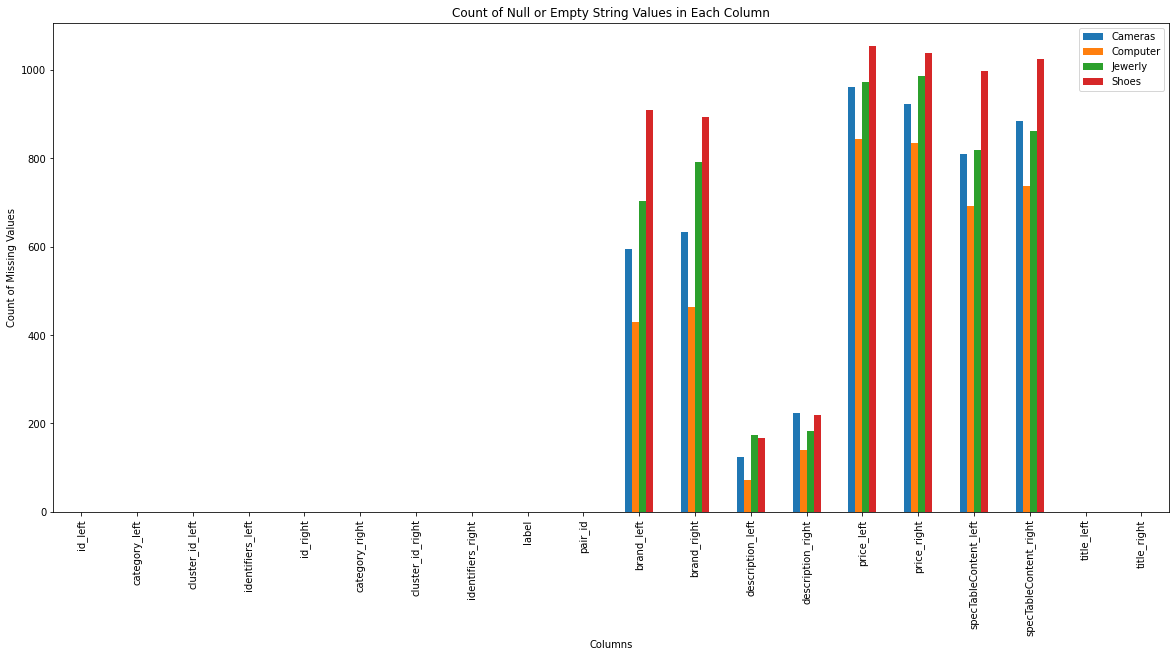

In [33]:
# missing_values_count_df1 = df_cam.isnull().sum() + (df_cam == '').sum()
# missing_values_count_df2 = df_com.isnull().sum() + (df_com == '').sum()
# missing_values_count_df3 = df_jew.isnull().sum() + (df_jew == '').sum()
# missing_values_count_df4 = df_sh.isnull().sum() + (df_sh == '').sum()

missing_values_counts_combined = pd.concat([missing_values_count_df1, missing_values_count_df2, missing_values_count_df3, missing_values_count_df4], axis=1, keys=['Cameras', 'Computer', 'Jewerly', 'Shoes'])

fig, ax = plt.subplots(figsize=(20, 9))
missing_values_counts_combined.plot(kind='bar', ax=ax)
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Count of Null or Empty String Values in Each Column')
plt.show()

# Unpairing the observations

In [48]:
df_left = df.filter(like='left')
df_right = df.filter(like='right')
df_left.columns = df_left.columns.str.replace('_left', '')
df_right.columns = df_right.columns.str.replace('_right', '')
merged_df = pd.concat([df_left, df_right])
merged_df = merged_df.drop_duplicates(subset='id', keep='first')
merged_df.head()

,id,category,cluster_id,brand,description,price,specTableContent,title
0,1861077,Camera_and_Photo,539882,"""GoPro""@en","""\nAllows you to plug your HERO3 camera into y...",None,None,"""GoPro HDMI Cable""@en Cable AHDMC-301 - Filmt..."
1,3083228,Computers_and_Accessories,640007,"""Benq""","""\n More>>>\n \n...",None,None,"""Benq ZOWIE RL2455 24"" Full HD TN Grey comput..."
2,403467,Jewelry,625465,None,None,None,None,""" Mens Nixon The Crew Watch A1186-001 ""Men's ..."
3,1383359,Shoes,10097862,None,"""\n The Met...",None,None,"""Nike Metcon 2 - Black/White/Wolf Grey/Volt""@..."
4,2677362,Camera_and_Photo,7228103,None,"""\n The DCS-6045LKT PowerLine HD ...",None,None,"""PowerLine HD Day Night Cloud Camera Kit""@hu ..."


### Analysing title lengths

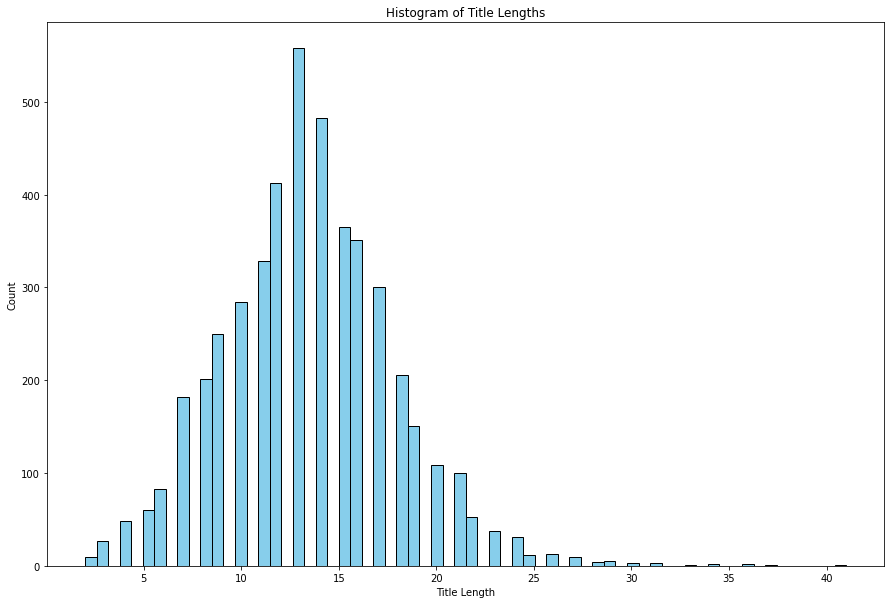

In [49]:
# df['title_length'] = df['title'].apply(len)
plt.figure(figsize=(15, 10))
plt.hist(merged_df['title'].str.split().apply(len), bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Title Length')
plt.ylabel('Count')
plt.title('Histogram of Title Lengths')
plt.show()

### Analysing description lengths

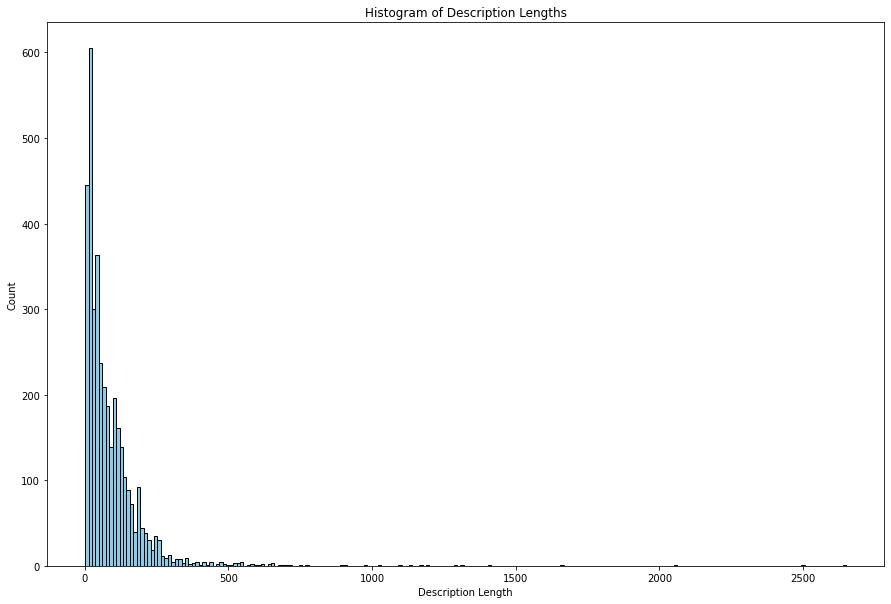

In [22]:
# df['title_length'] = df['title'].apply(len)
descrps = merged_df['description']
descrps = [i for i in descrps if i is not None]
descrps = pd.DataFrame(descrps).squeeze()
plt.figure(figsize=(15, 10))
plt.hist(descrps.str.split().apply(len), bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Description Length')
plt.ylabel('Count')
plt.title('Histogram of Description Lengths')
plt.show()

In [14]:
df = df.drop(columns=['identifiers_left', 'identifiers_right'])

### Amount of information carried by each variable - average length 

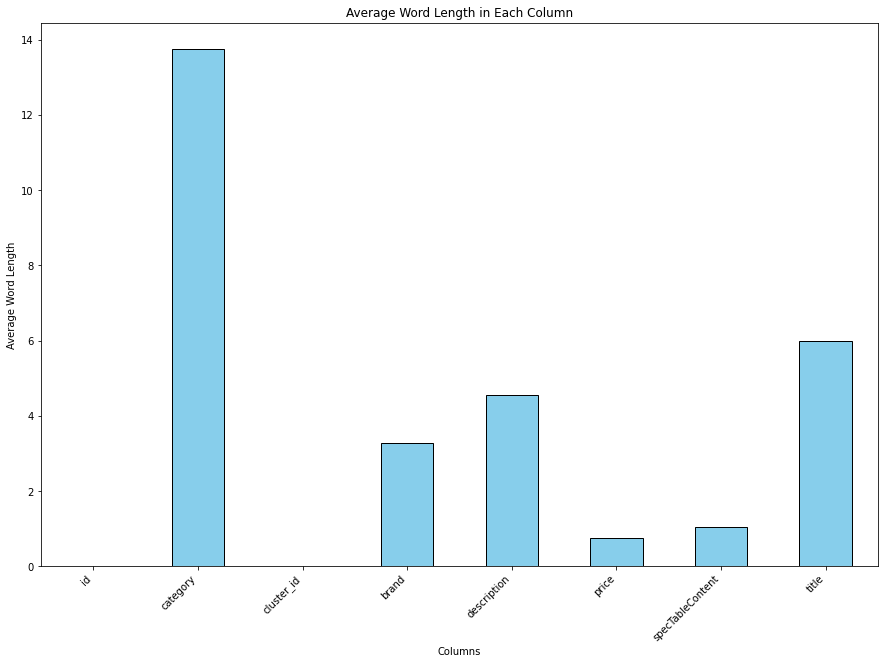

In [50]:
#średnia dlugosc wartosci w tej kolumnie

def average_word_length(value):
    if pd.notna(value)  and isinstance(value, str):
        words = value.split()
        return sum(len(word) for word in words) / len(words) if len(words) > 0 else 0
    return 0

average_lengths = merged_df.applymap(average_word_length).mean()

plt.figure(figsize=(15, 10))
average_lengths.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Columns')
plt.ylabel('Average Word Length')
plt.xticks(rotation=45, ha='right')
plt.title('Average Word Length in Each Column')

plt.show()

In [62]:
merged_cam = merged_df[merged_df['category'] == 'Camera_and_Photo']
merged_com = merged_df[merged_df['category'] == 'Computers_and_Accessories']
merged_jew = merged_df[merged_df['category'] == 'Jewelry']
merged_sh = merged_df[merged_df['category'] == 'Shoes']

# Titles

### Analysing the words in titles

#### Cameras

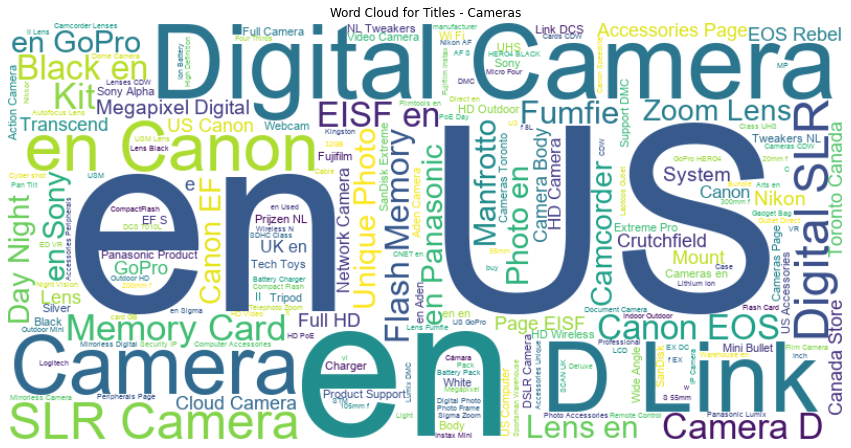

In [52]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(merged_cam['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='arial.ttf').generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud for Titles - Cameras')

plt.show()

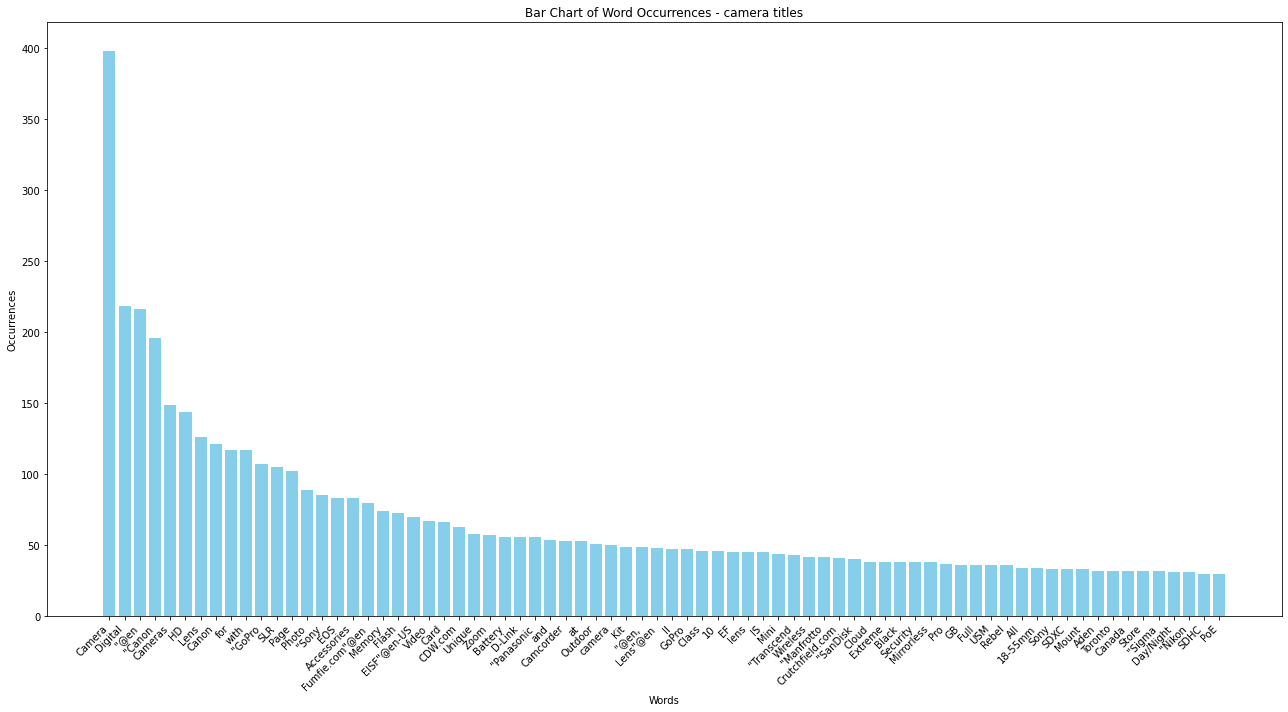

In [55]:
from collections import Counter


words = text.split()
word_counts = Counter(words)
filtered_word_counts = {word: count for word, count in word_counts.items() if count >= 30 and len(word) > 1}

sorted_word_counts = dict(sorted(filtered_word_counts.items(), key=lambda item: item[1], reverse=True))
words_to_plot = list(sorted_word_counts.keys())
counts_to_plot = list(sorted_word_counts.values())

plt.figure(figsize=(18, 10))
plt.bar(words_to_plot, counts_to_plot, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Bar Chart of Word Occurrences - camera titles')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()

#### Computers

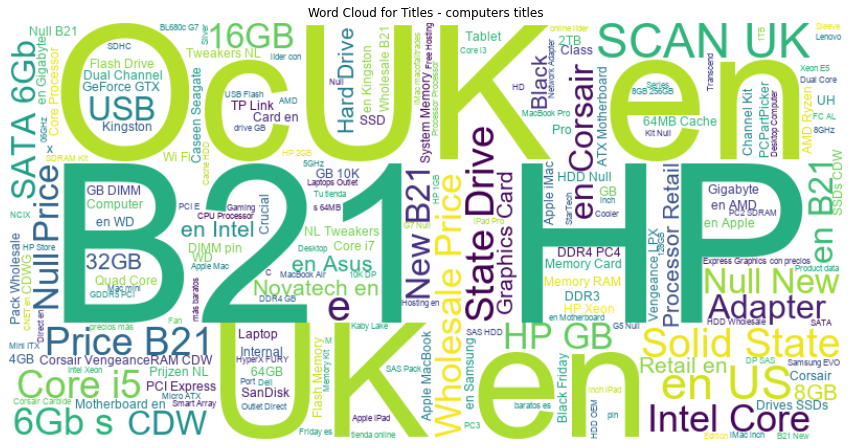

In [57]:
text = ' '.join(merged_com['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='arial.ttf').generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud for Titles - computers titles')
plt.show()

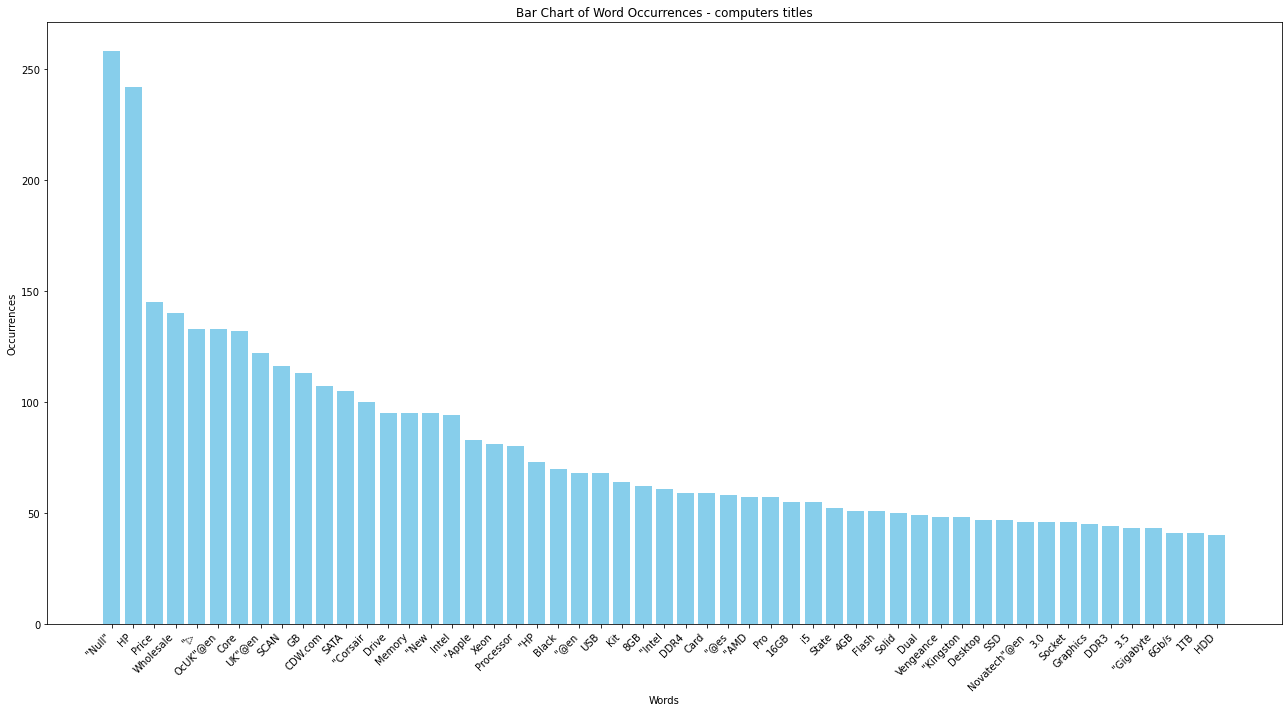

In [59]:
from collections import Counter

words = text.split()
word_counts = Counter(words)
filtered_word_counts = {word: count for word, count in word_counts.items() if count >= 40 and len(word) > 1}

sorted_word_counts = dict(sorted(filtered_word_counts.items(), key=lambda item: item[1], reverse=True))
words_to_plot = list(sorted_word_counts.keys())
counts_to_plot = list(sorted_word_counts.values())
plt.figure(figsize=(18, 10))
plt.bar(words_to_plot, counts_to_plot, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Bar Chart of Word Occurrences - computers titles')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

plt.show()

#### Jewerly

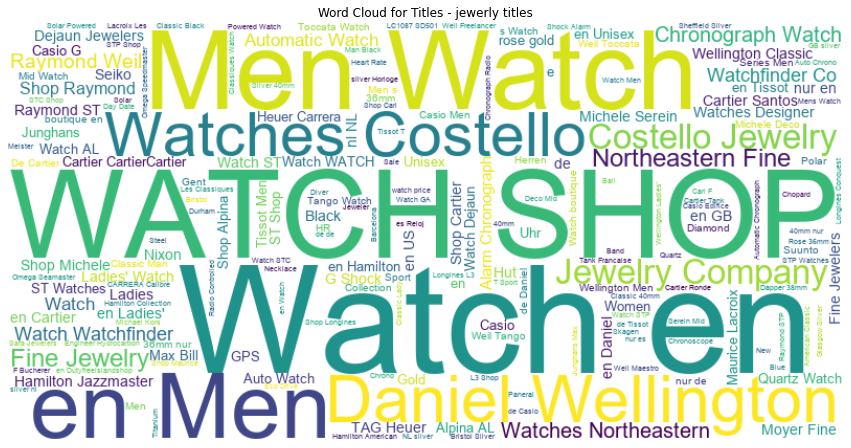

In [64]:
text = ' '.join(merged_jew['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='arial.ttf').generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud for Titles - jewerly titles')
plt.show()

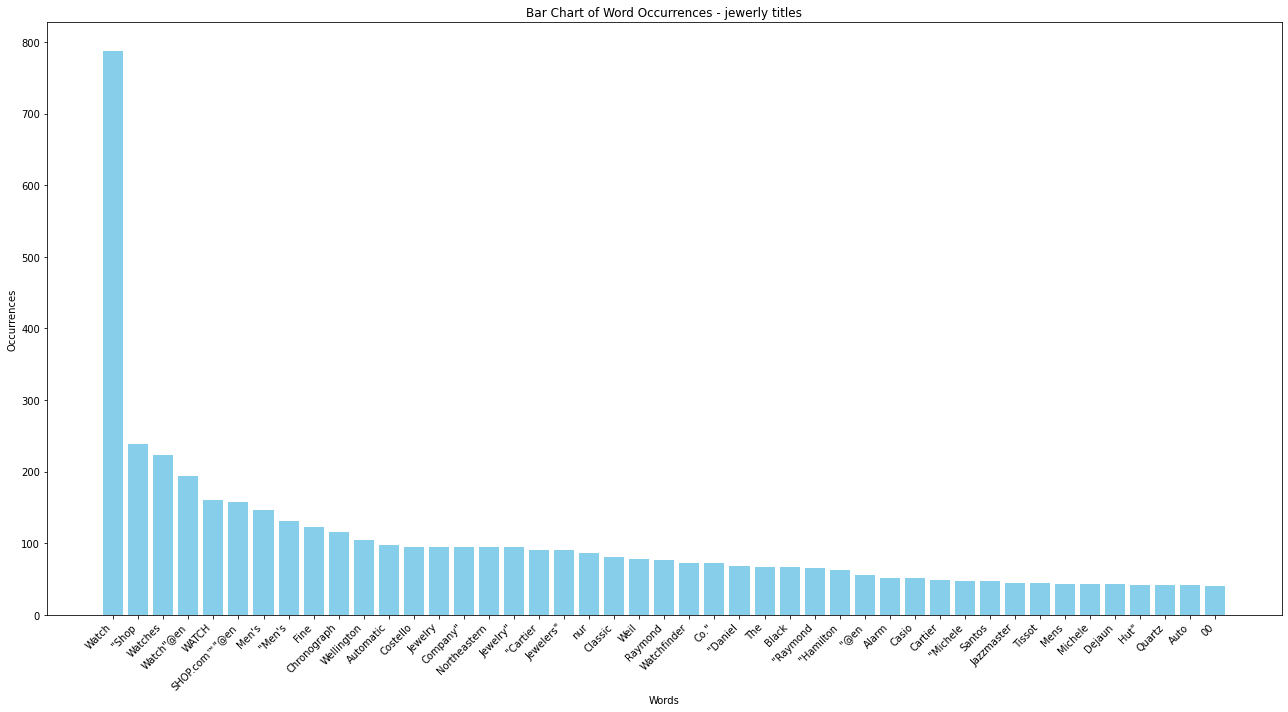

In [65]:
from collections import Counter

words = text.split()
word_counts = Counter(words)
filtered_word_counts = {word: count for word, count in word_counts.items() if count >= 40 and len(word) > 1}

sorted_word_counts = dict(sorted(filtered_word_counts.items(), key=lambda item: item[1], reverse=True))
words_to_plot = list(sorted_word_counts.keys())
counts_to_plot = list(sorted_word_counts.values())
plt.figure(figsize=(18, 10))
plt.bar(words_to_plot, counts_to_plot, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Bar Chart of Word Occurrences - jewerly titles')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

plt.show()

#### Shoes

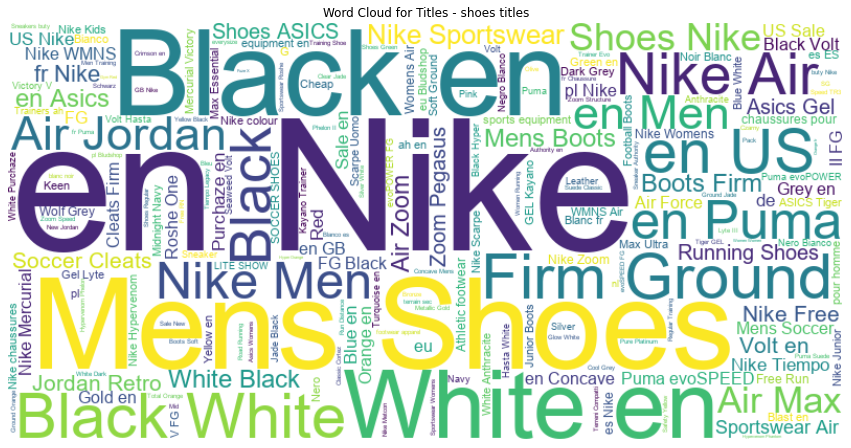

In [66]:
text = ' '.join(merged_sh['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='arial.ttf').generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud for Titles - shoes titles')
plt.show()

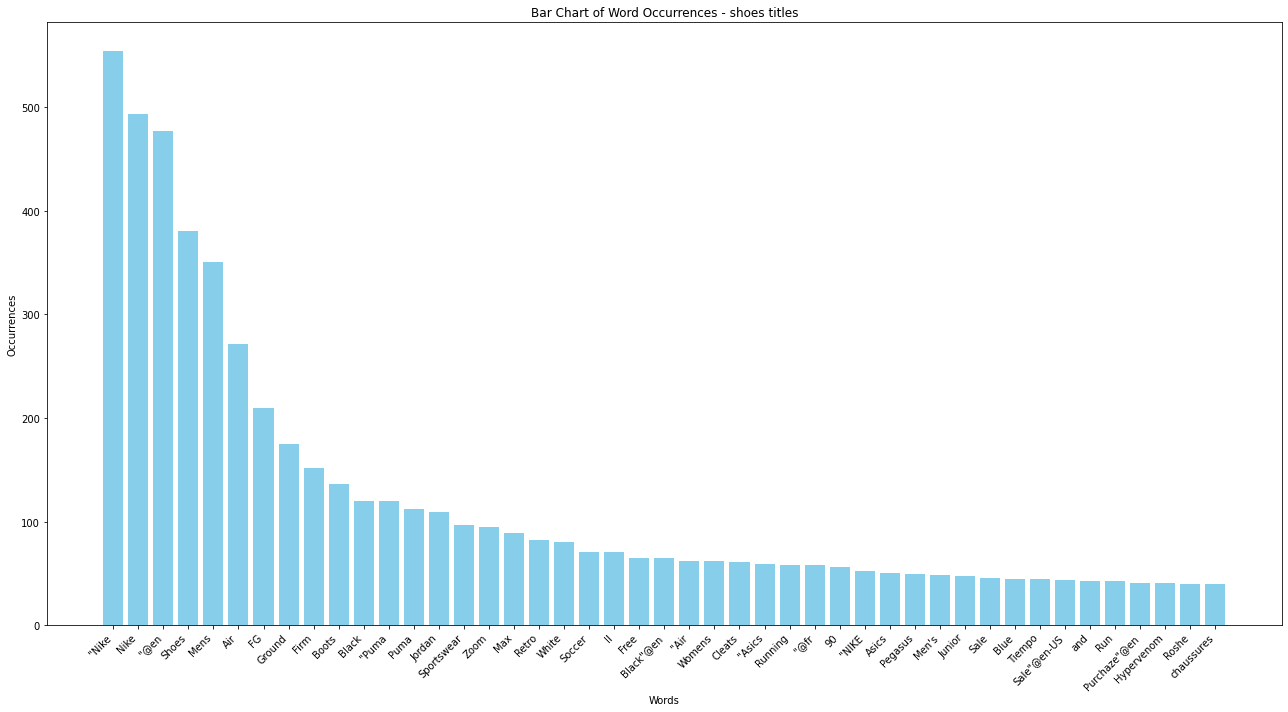

In [67]:
from collections import Counter

words = text.split()
word_counts = Counter(words)
filtered_word_counts = {word: count for word, count in word_counts.items() if count >= 40 and len(word) > 1}

sorted_word_counts = dict(sorted(filtered_word_counts.items(), key=lambda item: item[1], reverse=True))
words_to_plot = list(sorted_word_counts.keys())
counts_to_plot = list(sorted_word_counts.values())
plt.figure(figsize=(18, 10))
plt.bar(words_to_plot, counts_to_plot, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Bar Chart of Word Occurrences - shoes titles')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

plt.show()

### Analysing the words in description

In [69]:
from collections import Counter

def plot_occurences_in_description(df):  
    text = ' '.join(df['description'].astype(str))
    words = text.split()
    word_counts = Counter(words)
    filtered_word_counts = {word: count for word, count in word_counts.items() if count >= 100 and len(word) > 3}

    sorted_word_counts = dict(sorted(filtered_word_counts.items(), key=lambda item: item[1], reverse=True))
    words_to_plot = list(sorted_word_counts.keys())
    counts_to_plot = list(sorted_word_counts.values())

    plt.figure(figsize=(18, 10))
    plt.bar(words_to_plot, counts_to_plot, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Occurrences')
    plt.title('Bar Chart of Word Occurrences - napoj description')
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()

    # Display the plot
    plt.show()

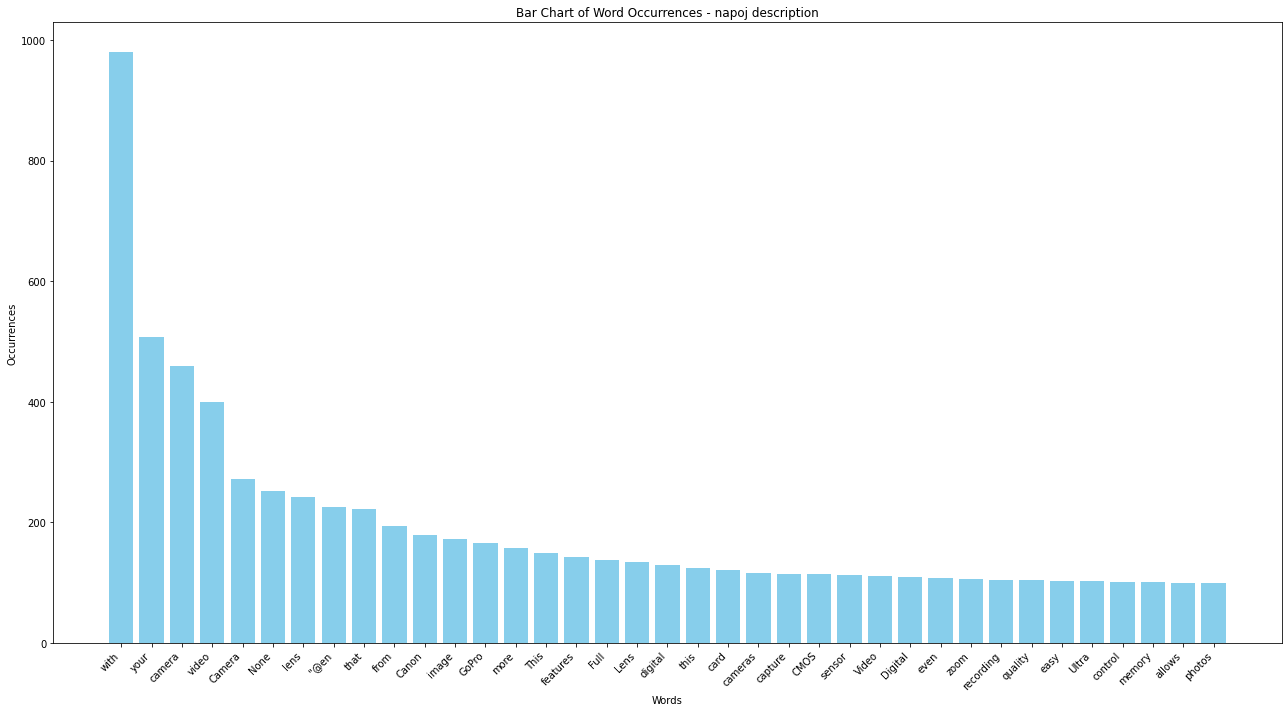

In [70]:
plot_occurences_in_description(merged_cam)


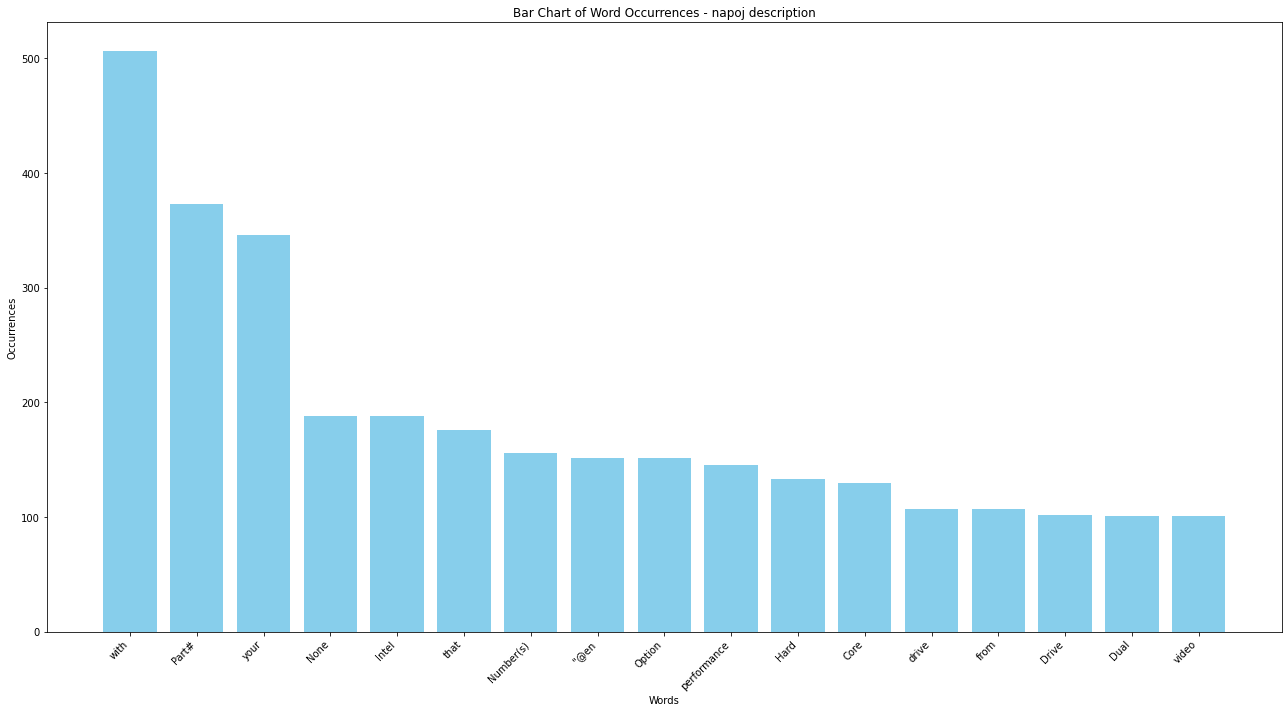

In [71]:
plot_occurences_in_description(merged_com)


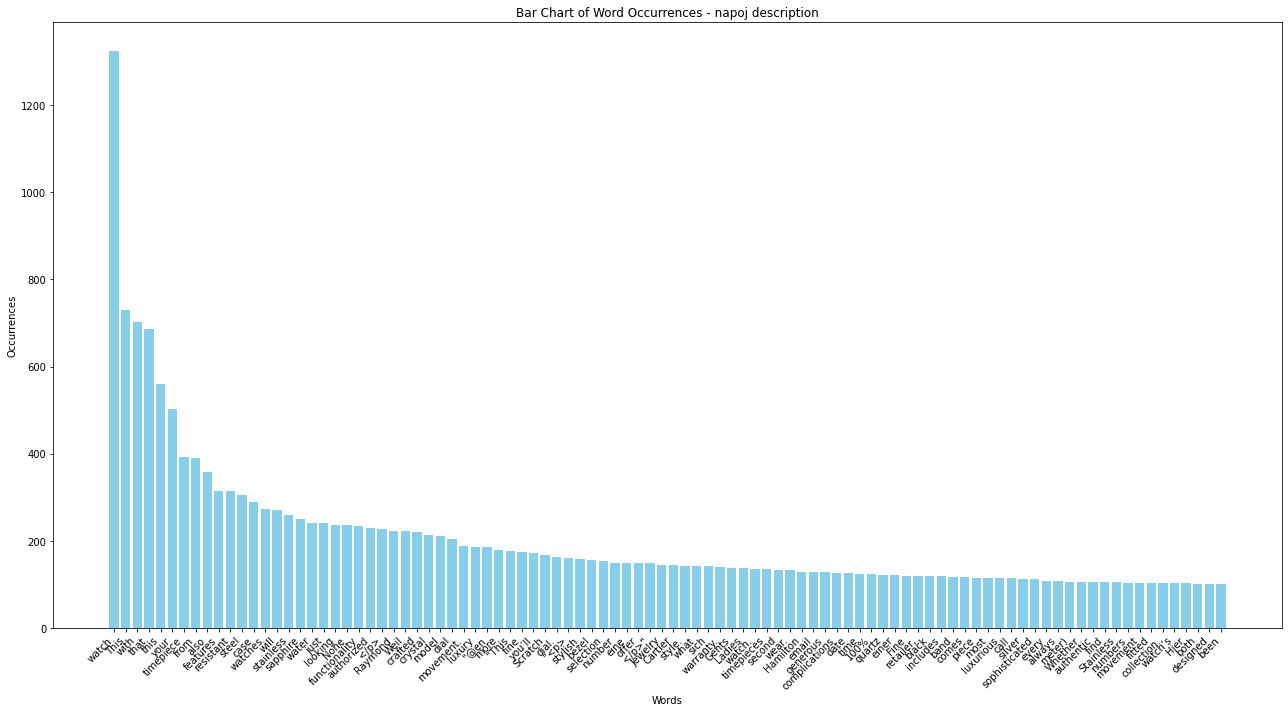

In [72]:
plot_occurences_in_description(merged_jew)


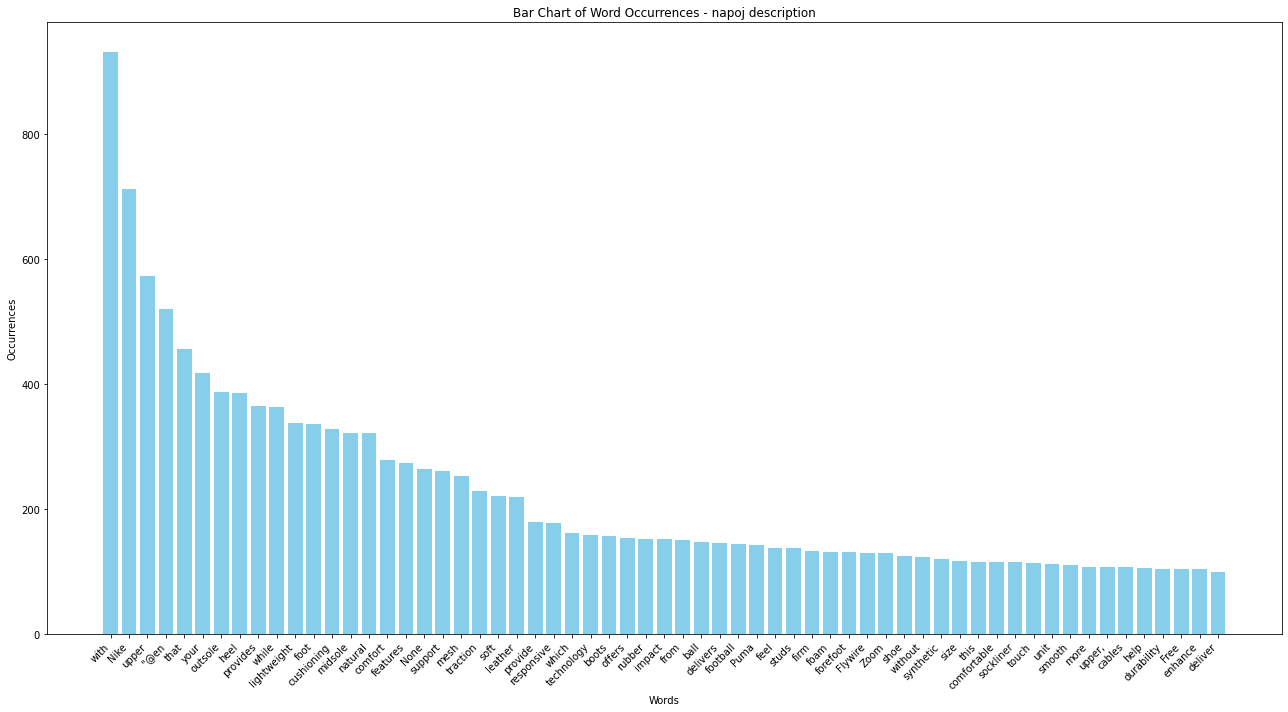

In [73]:
plot_occurences_in_description(merged_sh)


# Pairs analysis

In [15]:
# Function to calculate word overlap percentage
def word_overlap_percentage(row, column='title'):
    if row[f'{column}_left'] is None or row[f'{column}_right'] is None:
        overlap_percentage = None
    else:
        words_left = set(row[f'{column}_left'].split())
        words_right = set(row[f'{column}_right'].split())
        if len(words_left.union(words_right)) > 0 :
            overlap_percentage = (len(words_left.intersection(words_right)) / len(words_left.union(words_right))) * 100
        else:
            overlap_percentage = None    
    return overlap_percentage

In [16]:
# Calculate word overlap percentage for each row
df_1 = df[df['label'] == '1']
overlap_1 = df_1.apply(word_overlap_percentage, axis=1, column='title')
df_0 = df[df['label'] == '0']
overlap_0 = df_0.apply(word_overlap_percentage, axis=1, column='title')


### Percentage of words overlap in titles

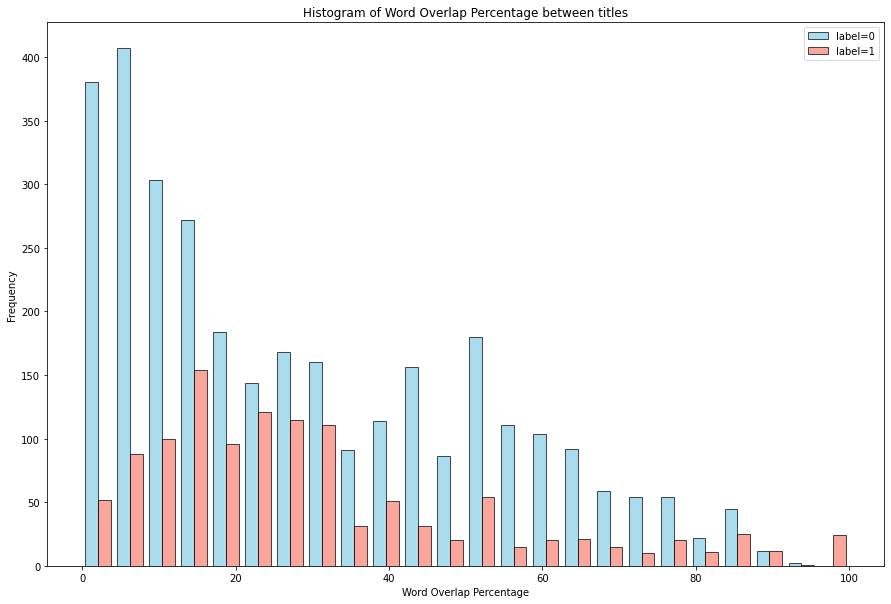

In [17]:
plt.figure(figsize=(15, 10))
plt.hist([overlap_0, overlap_1], bins='auto', color=['skyblue', 'salmon'],
         edgecolor='black', alpha=0.7, label=['label=0', 'label=1'])

plt.xlabel('Word Overlap Percentage')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.title('Histogram of Word Overlap Percentage between titles')

plt.show()

### Percentage of words overlap in descriptions

In [18]:
# Calculate word overlap percentage for each row
df_1 = df[df['label'] == '1']
overlap_1 = df_1.apply(word_overlap_percentage, axis=1, column='description')
overlap_1 = [i for i in overlap_1 if i is not None]

df_0 = df[df['label'] == '0']
overlap_0 = df_0.apply(word_overlap_percentage, axis=1, column='description')
overlap_0 = [i for i in overlap_0 if i is not None]


### Percentage of words overlap in descriptions

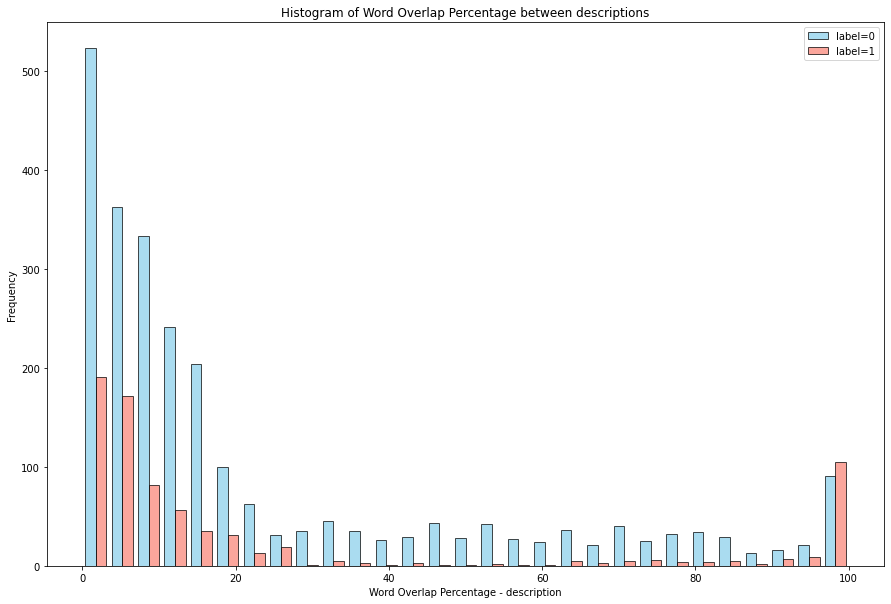

In [19]:
plt.figure(figsize=(15, 10))
plt.hist([overlap_0, overlap_1], bins='auto', color=['skyblue', 'salmon'],
         edgecolor='black', alpha=0.7, label=['label=0', 'label=1'])

plt.xlabel('Word Overlap Percentage - description')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.title('Histogram of Word Overlap Percentage between descriptions')

plt.show()

In [22]:
# # Calculate word overlap percentage for each row
# df_1 = df[df['label'] == 1]
# overlap_1 = df_1.apply(word_overlap_percentage, axis=1, column='specTableContent')
# overlap_1 = [i for i in overlap_1 if i is not None]

# df_0 = df[df['label'] == 0]
# overlap_0 = df_0.apply(word_overlap_percentage, axis=1, column='specTableContent')
# overlap_0 = [i for i in overlap_0 if i is not None]


# plt.figure(figsize=(15, 10))
# plt.hist([overlap_0, overlap_1], bins='auto', color=['skyblue', 'salmon'],
#          edgecolor='black', alpha=0.7, label=['label=0', 'label=1'])

# plt.xlabel('Word Overlap Percentage - description')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45, ha='right')

# plt.legend(loc="upper right")
# plt.title('Histogram of Word Overlap Percentage between table contents')

# plt.show()